In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import os
import random
import math
import shutil
import warnings
from PIL import Image
warnings.filterwarnings(action = "ignore")
plt.style.use(["seaborn-bright","dark_background"])

In [2]:
data = []
paths_train = []
paths_test=[]
y = []


for r, d, f in os.walk(r'C:\Users\Dell\OneDrive\Documents\jupyter\Brain tumor detection\Training'):
    
    for file in f:
      
        if '.jpg' in file:
            paths_train.append(os.path.join(r, file))
            
            
        if 'glioma_tumor' in r:
            y.append(3)
        elif 'meningioma_tumor' in r:
            y.append(2)
        elif 'pituitary_tumor' in r:
            y.append(1)
        elif 'no_tumor' in r:
            y.append(0)
             

for path in paths_train:
    
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))

In [5]:
for r, d, f in os.walk(r'C:\Users\Dell\OneDrive\Documents\jupyter\Brain tumor detection\Testing'):
    
    for file in f:
      
        if '.jpg' in file:
            paths_test.append(os.path.join(r, file))
            
            
        if 'glioma_tumor' in r:
            y.append(3)
        elif 'meningioma_tumor' in r:
            y.append(2)
        elif 'pituitary_tumor' in r:
            y.append(1)
        elif 'no_tumor' in r:
            y.append(0)
             

for path in paths_test:
    
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))

In [6]:
data= np.array(data)
data.shape

(3264, 128, 128, 3)

In [7]:
data= data.astype('float32')
data/=255

In [8]:
from keras.utils import np_utils
y= np.array(y)

y= np_utils.to_categorical(y)
y.shape

(3264, 4)

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(data,y,test_size=.20,shuffle=True,random_state=0)


In [10]:
xtrain,xval,ytrain,yval=train_test_split(xtrain,ytrain,test_size=.20,shuffle=True,random_state=0)

In [24]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D 
from keras.preprocessing.image import ImageDataGenerator
import keras

In [13]:
from keras.models import Sequential
from keras import layers
s= Sequential()
s.add(layers.Conv2D(16,(5,5),activation='relu',input_shape=(128,128,3)))
#s.add(layers.Conv2D(32,(3,3),activation='relu'))
s.add(layers.MaxPool2D((2,2)))
#s.add(layers.Dropout(.2))

s.add(layers.Conv2D(32,(3,3),activation='relu'))
#s.add(layers.Conv2D(128,(3,3),activation='relu'))
s.add(layers.MaxPool2D((2,2)))
#s.add(layers.Dropout(.2))

s.add(layers.Conv2D(64,(3,3),activation='relu'))
#s.add(layers.Conv2D(128,(3,3),activation='relu'))
s.add(layers.MaxPool2D((2,2)))
s.add(layers.Dropout(.3))

s.add(layers.Flatten())
s.add(layers.Dense(512,activation='relu'))
s.add(layers.Dropout(.2))
s.add(layers.Dense(4, activation='softmax'))
s.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy',tf.keras.metrics.Recall()])
print(s.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [14]:
from tensorflow.keras.losses  import mean_squared_error, BinaryCrossentropy , categorical_crossentropy
s.compile(optimizer='adam',
              loss= 'categorical_crossentropy' ,
              metrics=['accuracy',tf.keras.metrics.Recall()])

In [17]:
h=s.fit(xtrain,ytrain,validation_data = (xval, yval),batch_size=10,epochs=10,verbose=1)

Epoch 1/10
209/209 [==============================] - 45s 218ms/step - loss: 0.0186 - accuracy: 0.9938 - recall_1: 0.9933 - val_loss: 0.7249 - val_accuracy: 0.8929 - val_recall_1: 0.8891
Epoch 2/10
209/209 [==============================] - 45s 217ms/step - loss: 0.0164 - accuracy: 0.9947 - recall_1: 0.9947 - val_loss: 0.6152 - val_accuracy: 0.9063 - val_recall_1: 0.9063
Epoch 3/10
209/209 [==============================] - 46s 219ms/step - loss: 0.0086 - accuracy: 0.9971 - recall_1: 0.9971 - val_loss: 0.9740 - val_accuracy: 0.8929 - val_recall_1: 0.8929
Epoch 4/10
209/209 [==============================] - 46s 218ms/step - loss: 0.0546 - accuracy: 0.9832 - recall_1: 0.9832 - val_loss: 0.8854 - val_accuracy: 0.8738 - val_recall_1: 0.8738
Epoch 5/10
209/209 [==============================] - 59s 284ms/step - loss: 0.0213 - accuracy: 0.9899 - recall_1: 0.9899 - val_loss: 0.9402 - val_accuracy: 0.8757 - val_recall_1: 0.8757
Epoch 6/10
209/209 [==============================] - 49s 235ms/s

In [18]:
s.save('my_model.h5')
x=s.predict(xtest)
s.evaluate(xtest,ytest)

21/21 [==============================] - 3s 126ms/step - loss: 0.5887 - accuracy: 0.9066 - recall_1: 0.9066


[0.5886644721031189, 0.9065849781036377, 0.9065849781036377]

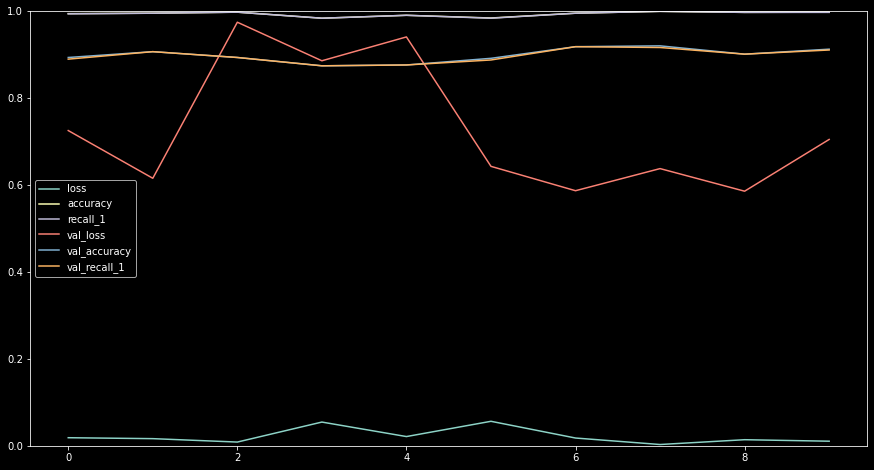

In [19]:
pd.DataFrame(h.history).plot(figsize = (15,8)) 
plt.gca().set_ylim(0,1)
plt.show()

In [20]:
new_model= keras.models.load_model("my_model.h5")
accuracy=new_model.evaluate(xtest,ytest)

21/21 [==============================] - 3s 127ms/step - loss: 0.5887 - accuracy: 0.9066 - recall_1: 0.9066


In [21]:
predict= (new_model.predict(xtest)>0.5).astype("int32")

21/21 [==============================] - 3s 124ms/step


In [22]:
tumor_classes=['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
for i in range (len(x)):
    predicted_tumor=tumor_classes[np.argmax(x[i])]

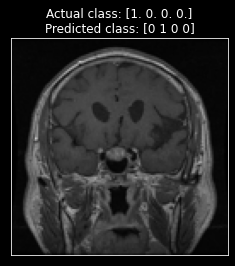

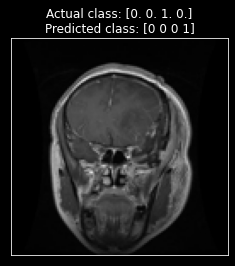

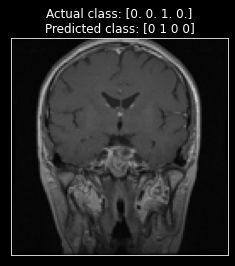

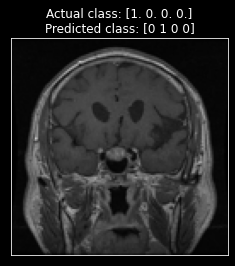

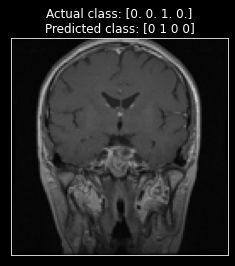

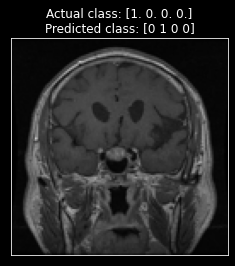

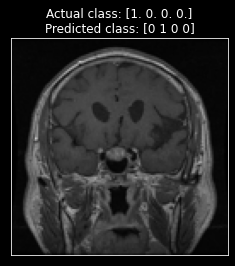

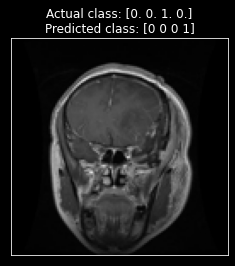

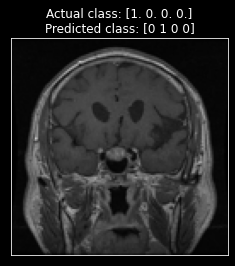

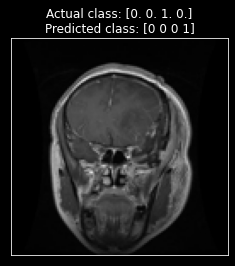

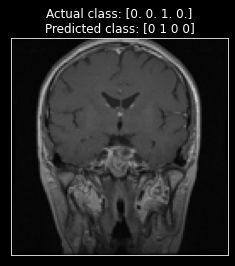

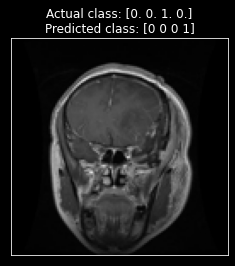

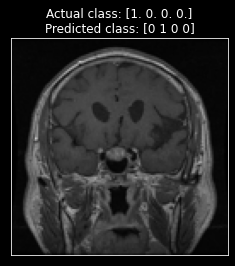

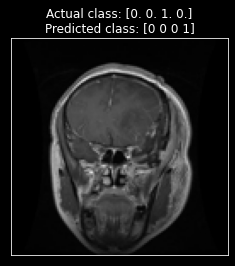

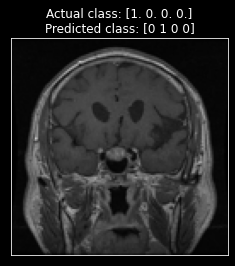

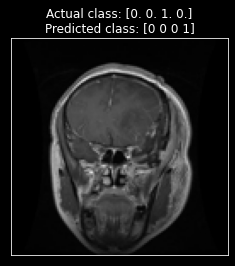

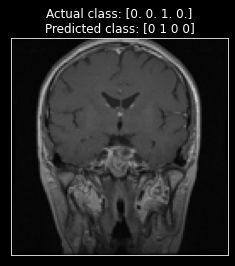

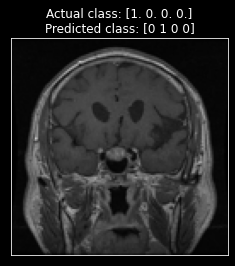

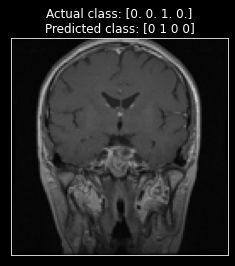

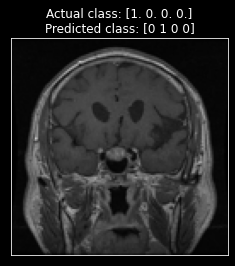

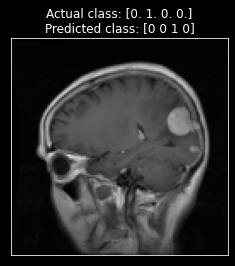

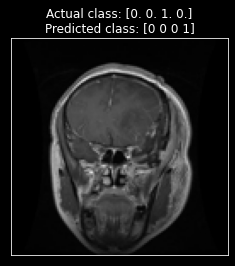

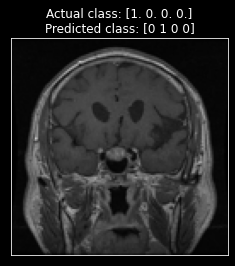

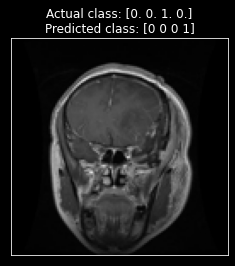

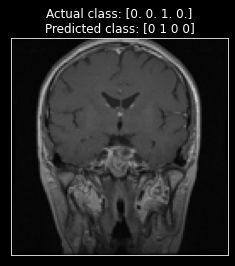

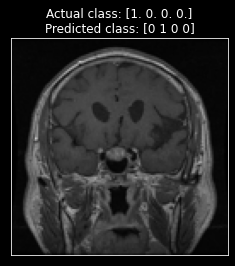

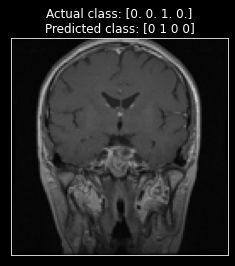

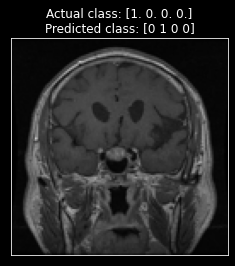

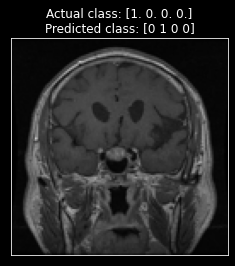

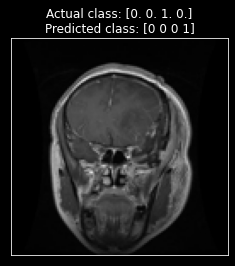

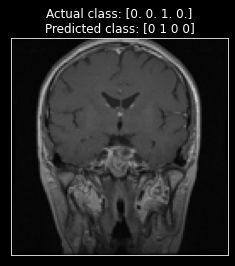

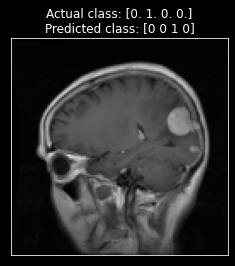

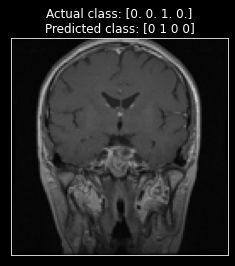

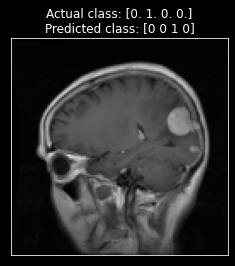

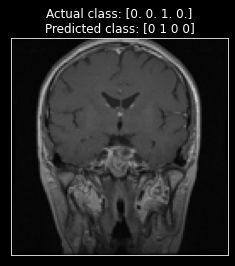

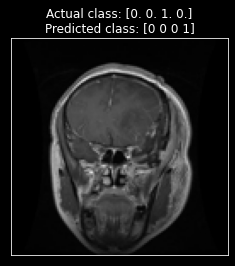

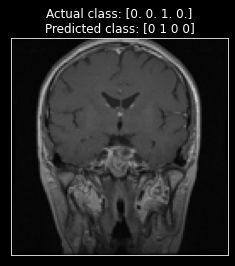

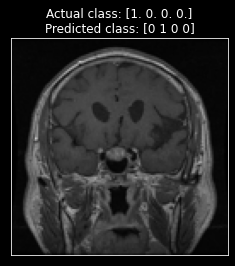

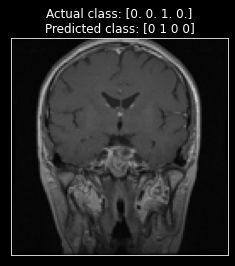

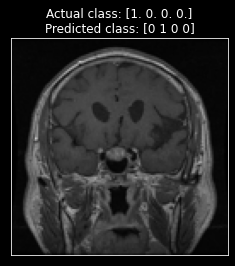

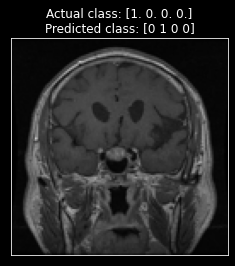

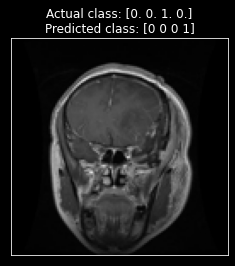

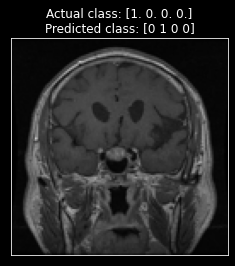

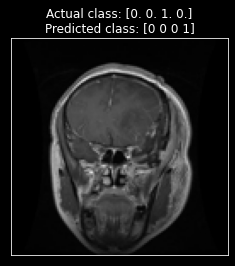

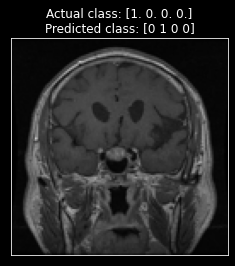

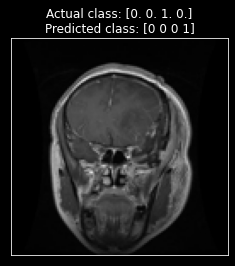

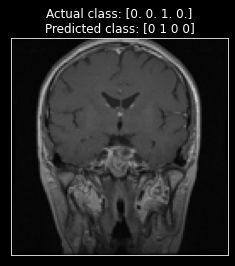

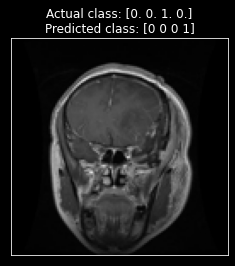

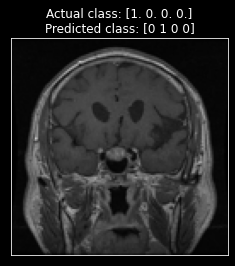

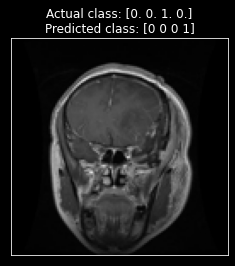

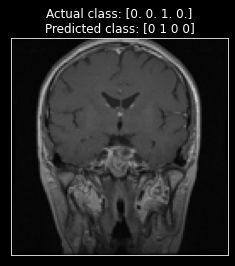

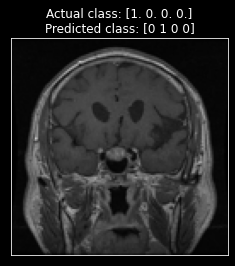

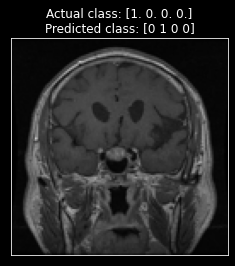

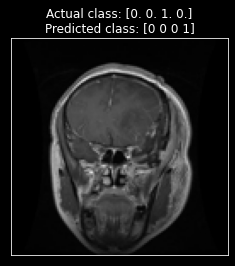

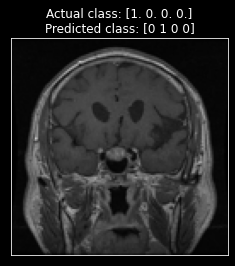

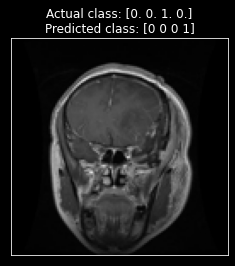

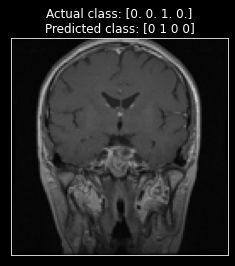

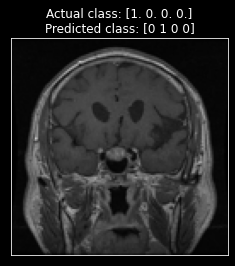

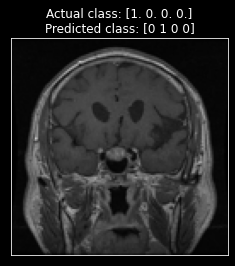

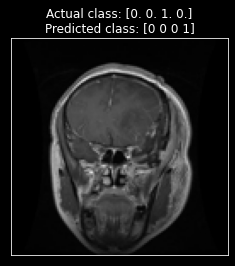

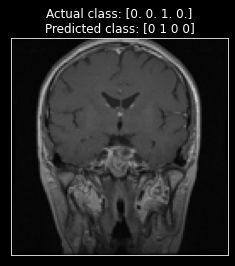

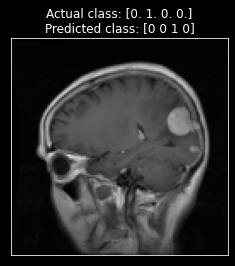

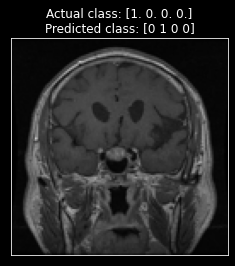

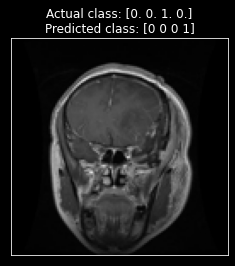

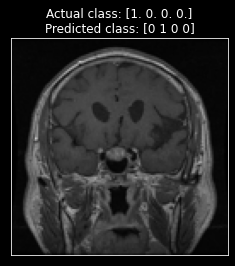

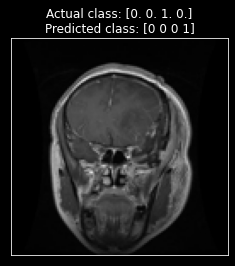

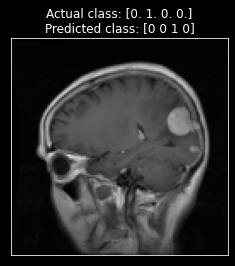

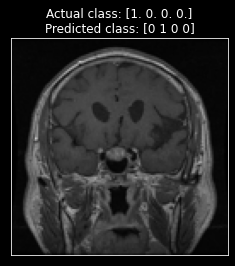

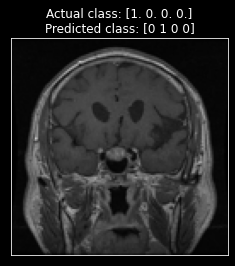

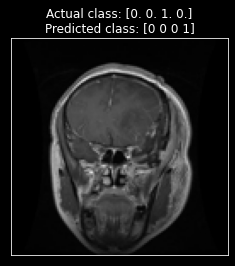

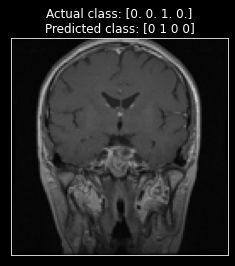

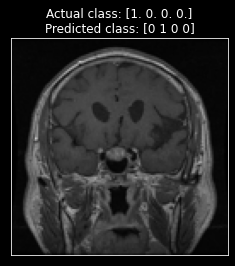

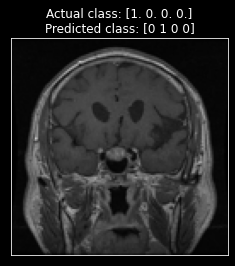

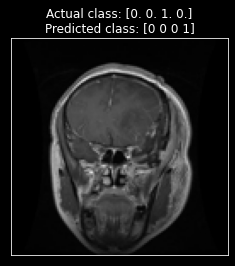

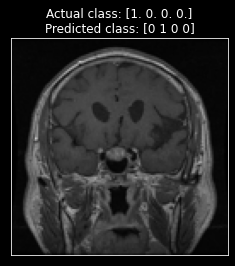

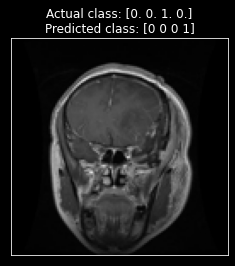

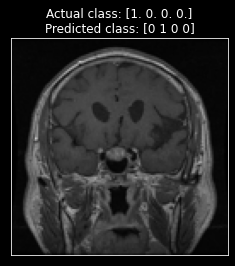

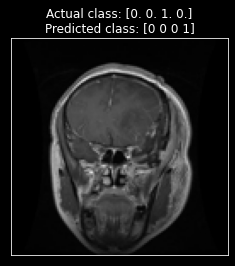

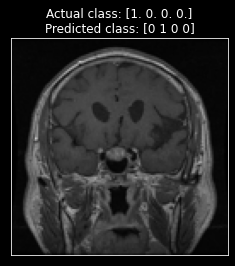

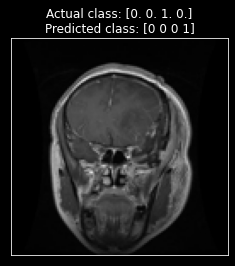

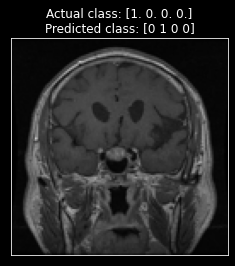

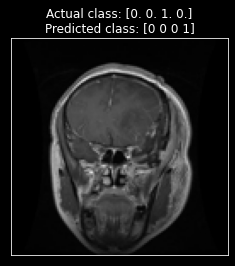

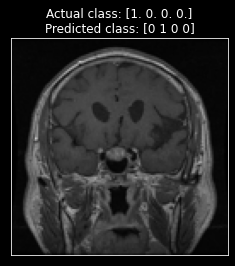

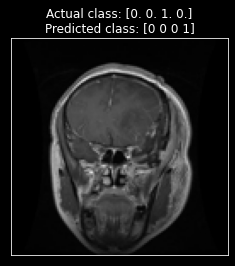

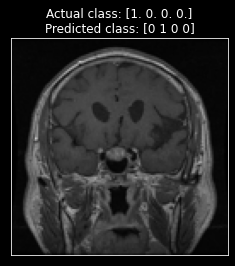

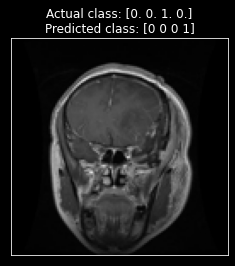

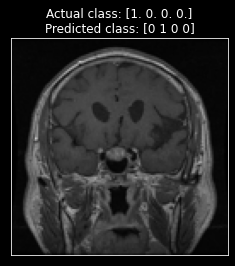

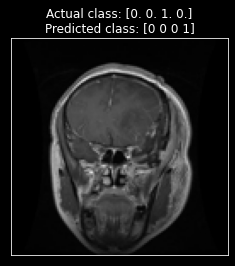

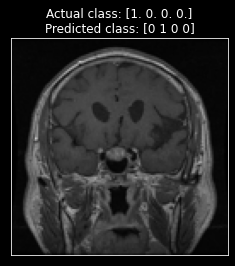

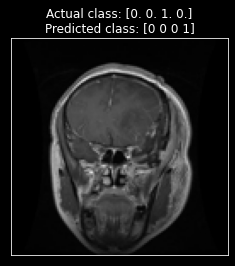

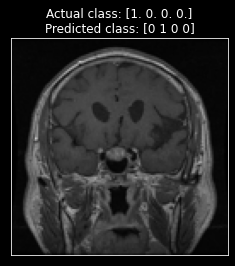

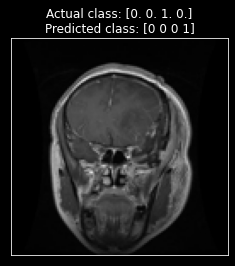

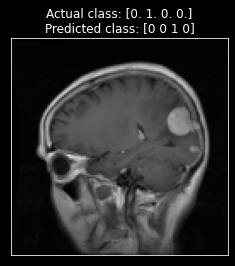

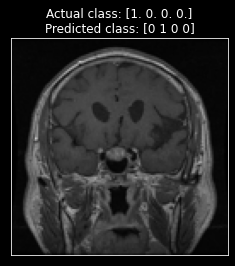

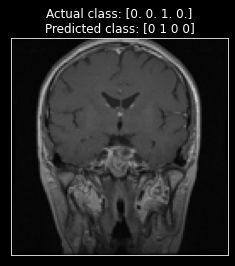

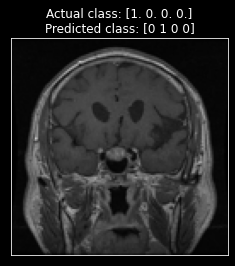

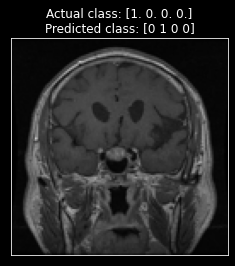

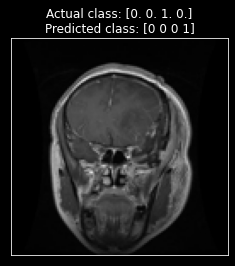

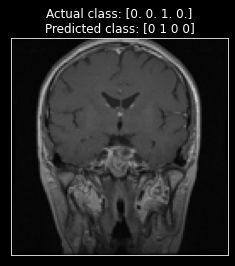

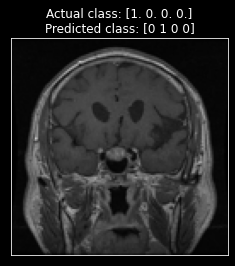

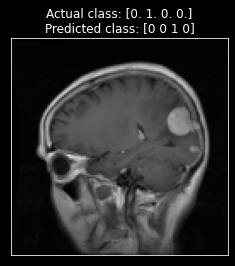

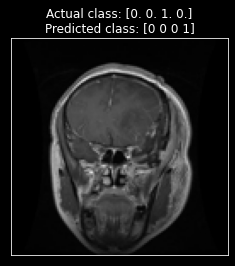

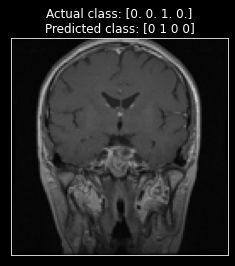

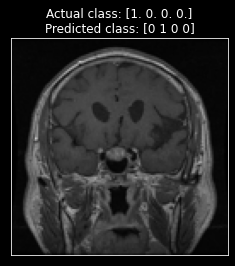

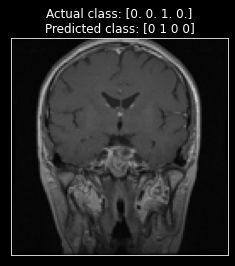

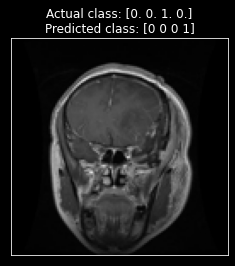

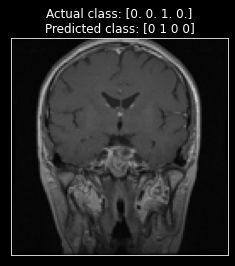

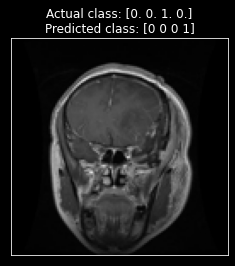

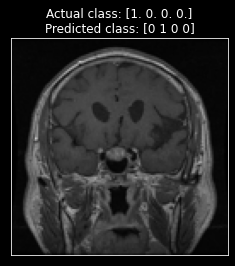

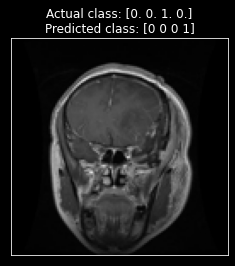

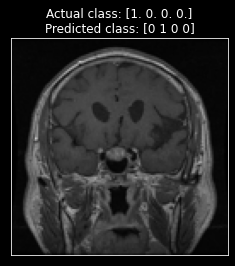

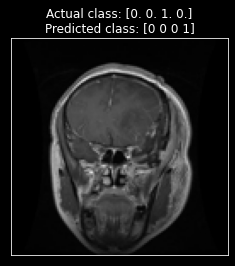

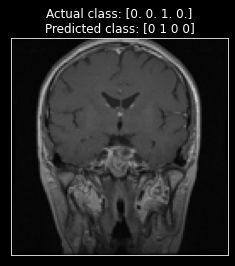

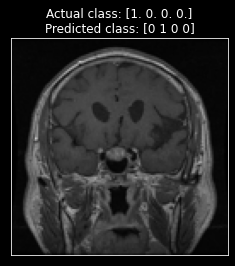

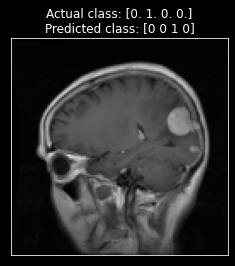

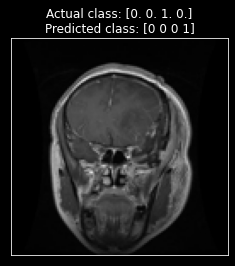

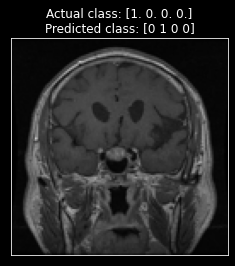

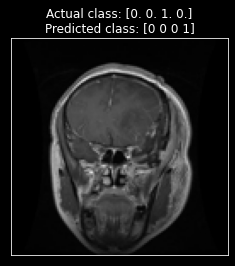

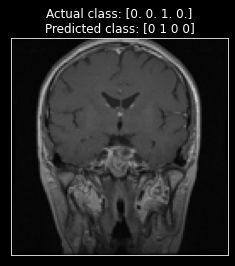

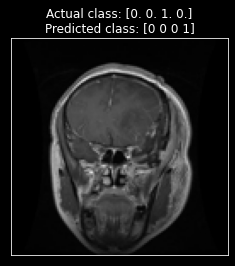

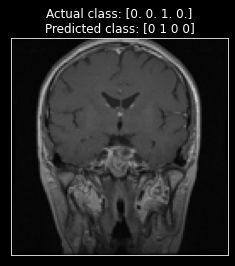

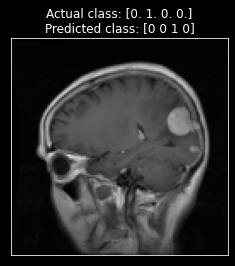

In [23]:
ind_list = np.argwhere((ytest == predict) == False)[:, -1]
if ind_list.size == 0:
    print('There are no missclassified images.')
else:
    for i in ind_list:
        plt.figure()
        plt.imshow(xtest[i])
        plt.xticks([])
        plt.yticks([])
        plt.title(f'Actual class: {yval[i]}\nPredicted class: {predict[i]}')
        plt.show()